<a href="https://colab.research.google.com/github/anakingui/portfolio/blob/main/ingenieria_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Guillermo Reyes Valencia

# **Etapa 1**

In [ ]:
# Paquetería 
import pandas as pd
import numpy as np
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=dae640d9d2e78482e40085f0124625540ef73ca5abf8616dea5afbaa21e759d5
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
# Lectura de Datos pd.read_csv("airbnb_mexico_dataset.csv")
datos = pd.read_csv("/content/Employees.csv")
datos.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [ ]:
# Tamaño de arreglo
datos.shape

(7000, 17)

In [ ]:
# Se buscarán los valores perdidos hay en los datos
pd.isna(datos).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

Se observa que  existen valores faltantes en las variables Age, Time_of_Service, Pay_scale y Work_Life_balance

In [ ]:
# se imputaran valores a la columna 'Age' por medio de la mediana, ya que 
# corresponde a un valor entero, lo mismo se hace para la variable 
# Time_of_service
datos['Age'].fillna(datos['Age'].median(), inplace=True)
datos['Time_of_service'].fillna(datos['Time_of_service'].median(), inplace=True)

In [ ]:
# Checo que la columna Age no tiene valores NaN
pd.isna(datos).sum()

Employee_ID                   0
Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     9
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

In [ ]:
# Se le asigna el valor de la moda a los valores faltantes de Pay_Scale que
# es una variable categorica
datos['Pay_Scale'].fillna(datos['Pay_Scale'].value_counts().idxmax(),
                          inplace=True)
                          

In [ ]:
pd.isna(datos).sum()

Employee_ID                   0
Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     0
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

In [ ]:
# Se observa que la variable Work_Life_balance es de tipo categorico
# por lo tanto se le imputaran valores por medio de la moda
datos['Work_Life_balance'].unique()

array([ 3.,  4.,  1.,  2.,  5., nan])

In [ ]:
datos['Work_Life_balance'].fillna(
    datos['Work_Life_balance'].value_counts().idxmax(), inplace=True) 


In [ ]:
# finalmente reviso que no haya datos faltantes
pd.isna(datos).sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

# **Etapa 2**
Se analizarán a continuacion las características de los datos

In [ ]:
datos.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.468429,3.187857,13.315429,2.367143,47.064286,0.817857,2.798000,6.008857,2.385714,0.189376
std,13.214784,1.065102,10.268266,1.149395,15.761406,0.648205,1.163721,2.058352,1.123250,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.995900


Se analizaron los datos mediante la instrucción describe() para observar todos los datos disponibles en la busqueda de valores atípicos, mediante la instrucción unique() se buscaron discrepancias en las variables categóricas, algunos datos atipicos se eliminan a continuación mediante el uso de boxplots

(array([1282., 1155., 1225., 1230.,  539.,  656.,   89.,   80.,   95.,
          73.,   81.,   80.,   64.,   63.,   79.,   79.,   24.,   32.,
          34.,   40.]),
 array([0.      , 0.049795, 0.09959 , 0.149385, 0.19918 , 0.248975,
        0.29877 , 0.348565, 0.39836 , 0.448155, 0.49795 , 0.547745,
        0.59754 , 0.647335, 0.69713 , 0.746925, 0.79672 , 0.846515,
        0.89631 , 0.946105, 0.9959  ]),
 <a list of 20 Patch objects>)

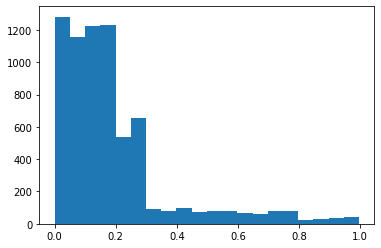

In [ ]:
import matplotlib.pyplot as plt
plt.hist(datos.Attrition_rate, bins = 20)

Al analizar la tasa de deserción mediante un histograma, se encuentra que los datos tienen sesgo

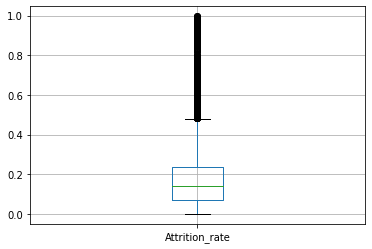

In [ ]:
boxplot = datos.boxplot(column=['Attrition_rate'])
boxplot

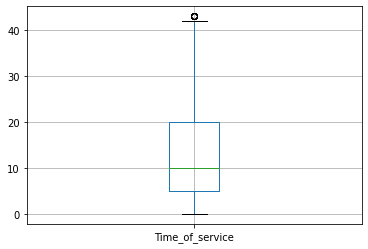

In [ ]:
boxplot = datos.boxplot(column=['Time_of_service'])
boxplot

Se elimina el maximo del tiempo de servicio que solo son 8 datos

In [ ]:
datos = datos[(datos['Time_of_service'] < 43) ]
datos.shape 

(6992, 17)

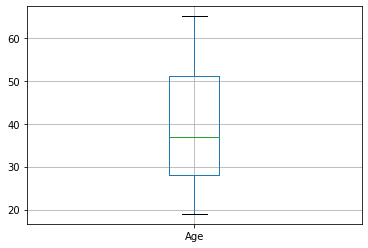

In [ ]:
boxplot = datos.boxplot(column=['Age'])
boxplot

Igualmente se observan valores atipicos en la gráfica, serán analizados a continuación

In [ ]:
# Proceso estadístico con la desviación estándar

factor = 2 #probar con 2 y 3
upper_lim = datos['Attrition_rate'].mean() + datos['Attrition_rate'].std()*factor
print(upper_lim)
lower_lim = datos['Attrition_rate'].mean() - datos['Attrition_rate'].std()*factor
print(lower_lim)

# Valores que están fuera de estos límites

datos2 = datos[(datos['Attrition_rate'] < upper_lim) & (datos['Attrition_rate'] > lower_lim)]
datos2.shape 

0.5610921247275912
-0.18227295996786577


(6515, 17)

In [ ]:
# Se reinician los índices
datos2 = datos2.reset_index()


In [ ]:
# Se elimina la columna index que se genera
datos2 = datos2.drop(['index'], axis=1)

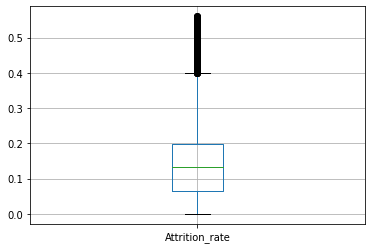

In [ ]:
boxplot = datos2.boxplot(column=['Attrition_rate'])
boxplot

Mediante el analisis de la desviación estandar se eliminaron algunos datos atípicos, sin embargo, se requiere aun mayor tratamiento posterior

(array([735., 689., 624., 696., 681., 712., 668., 314., 344., 400., 239.,
         48.,  40.,  54.,  46.,  53.,  38.,  49.,  43.,  42.]),
 array([0.      , 0.028025, 0.05605 , 0.084075, 0.1121  , 0.140125,
        0.16815 , 0.196175, 0.2242  , 0.252225, 0.28025 , 0.308275,
        0.3363  , 0.364325, 0.39235 , 0.420375, 0.4484  , 0.476425,
        0.50445 , 0.532475, 0.5605  ]),
 <a list of 20 Patch objects>)

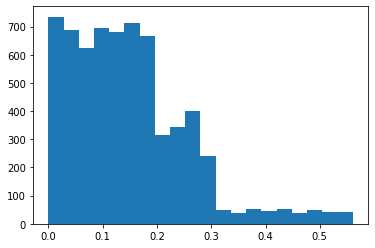

In [ ]:
plt.hist(datos2.Attrition_rate, bins = 20)

## **One hot encoding**

Se separan las variables categoricas en un nuevo dataframe

In [ ]:
datos2['Compensation_and_Benefits'].unique()

array(['type2', 'type3', 'type0', 'type4', 'type1'], dtype=object)

In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                6515 non-null   object 
 1   Gender                     6515 non-null   object 
 2   Age                        6515 non-null   float64
 3   Education_Level            6515 non-null   int64  
 4   Relationship_Status        6515 non-null   object 
 5   Hometown                   6515 non-null   object 
 6   Unit                       6515 non-null   object 
 7   Decision_skill_possess     6515 non-null   object 
 8   Time_of_service            6515 non-null   float64
 9   Time_since_promotion       6515 non-null   int64  
 10  growth_rate                6515 non-null   int64  
 11  Travel_Rate                6515 non-null   int64  
 12  Post_Level                 6515 non-null   int64  
 13  Pay_Scale                  6515 non-null   float

Se observa que en algunas variables categóricas tienen valores flotantes y enteros, por lo tanto para que se pueda usar la tecnica de one hot encoding, se necesitan convertir a caracteres, hay que mencionar que el caso de genero se considera una variable binaria y se clasificará por sus dos valores en 0 y 1

In [ ]:
categoricas = datos2.astype({'Education_Level':'str',
                            'Pay_Scale':'str','Work_Life_balance':'str','Post_Level':'str','Travel_Rate':'str'})

In [ ]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                6515 non-null   object 
 1   Gender                     6515 non-null   object 
 2   Age                        6515 non-null   float64
 3   Education_Level            6515 non-null   object 
 4   Relationship_Status        6515 non-null   object 
 5   Hometown                   6515 non-null   object 
 6   Unit                       6515 non-null   object 
 7   Decision_skill_possess     6515 non-null   object 
 8   Time_of_service            6515 non-null   float64
 9   Time_since_promotion       6515 non-null   int64  
 10  growth_rate                6515 non-null   int64  
 11  Travel_Rate                6515 non-null   object 
 12  Post_Level                 6515 non-null   object 
 13  Pay_Scale                  6515 non-null   objec

In [ ]:
categoricas = categoricas.drop(['Employee_ID','Age','Time_of_service',
                                'Time_since_promotion','Attrition_rate',
                                'growth_rate'],axis=1)
categoricas2 =pd.get_dummies(categoricas,drop_first=True)

El dataframe categoricas2 contiene las variables categoricas procesadas mediante la técnica de one hot encoding

In [ ]:
categoricas2

,Gender_M,Education_Level_2,Education_Level_3,Education_Level_4,Education_Level_5,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,...,Pay_Scale_8.0,Pay_Scale_9.0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6511,1,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
6512,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6513,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
categoricas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender_M                           6515 non-null   uint8
 1   Education_Level_2                  6515 non-null   uint8
 2   Education_Level_3                  6515 non-null   uint8
 3   Education_Level_4                  6515 non-null   uint8
 4   Education_Level_5                  6515 non-null   uint8
 5   Relationship_Status_Single         6515 non-null   uint8
 6   Hometown_Franklin                  6515 non-null   uint8
 7   Hometown_Lebanon                   6515 non-null   uint8
 8   Hometown_Springfield               6515 non-null   uint8
 9   Hometown_Washington                6515 non-null   uint8
 10  Unit_Human Resource Management     6515 non-null   uint8
 11  Unit_IT                            6515 non-null   uint8
 12  Unit_Logistics      

Se puede observar asimismo que algunas variables se encuentran agrupadas, de acuerdo con mi análisis la variable Education_Level esta agrupada en categorias, ya que probablemente engloba en cada una de sus categorias estudios basicos o especializaciones y les asigna un valor, Pay_Scale es otra variable que considero esta agrupada por medio de binning, ya que cada una de las escalas debe contener rangos de salarios, Compensations and benefits debe ser una variable que agrupada por binning, ya que cada uno de los niveles engloba distintos beneficios y compensaciones a empleados que bien podrian ser economicas o de servicios

Se genera un dataframe  que contiene los datos originales con las columnas procesadas por medio de la técnicas de One hot encoding

In [ ]:
datos_en = datos2.join(categoricas2)

In [ ]:
datos_en

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale_8.0,Pay_Scale_9.0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,0,0,0,1,0,0,0,1,0,0
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,0,0,0,1,0,0,0,0,1,0
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,1,0,0,1,0,0,0,0,0,0
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,1,0,0,1,0,0,0,0,0,0
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,EID_12529,M,33.0,4,Married,Franklin,Logistics,Directive,7.0,4,...,0,0,0,0,1,0,1,0,0,0
6511,EID_11159,M,33.0,3,Married,Springfield,Accounting and Finance,Behavioral,9.0,3,...,1,0,0,1,0,0,0,0,1,0
6512,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,0,0,0,0,1,0,0,1,0,0
6513,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,1,0,0,0,0,0,1,0,0,0


# **Etapa 3**

Se separan las variables numericas de las variables categoricas, ademas se analizará el sesgo de la variable y, para estandarizar y escalar de manera adecuada las variables numericas

In [ ]:
numericas = datos2.drop(['Employee_ID','Gender','Education_Level',
                      'Relationship_Status','Post_Level','Hometown','Unit',
                      'Decision_skill_possess','Travel_Rate',
                      'Pay_Scale', 'Compensation_and_Benefits',
                      'Work_Life_balance'], axis=1)

In [ ]:
numericas

,Age,Time_of_service,Time_since_promotion,growth_rate,Attrition_rate
0,42.0,4.0,4,33,0.1841
1,24.0,5.0,4,36,0.0670
2,58.0,27.0,3,51,0.0851
3,26.0,4.0,3,56,0.0668
4,31.0,5.0,4,62,0.1827
...,...,...,...,...,...
6510,33.0,7.0,4,66,0.2569
6511,33.0,9.0,3,34,0.0480
6512,44.0,16.0,2,59,0.1055
6513,47.0,24.0,1,21,0.4162


In [ ]:
numericas['Attrition_rate'].skew()


1.1487572626631997

Se observa que la variable posee sesgo, por lo tanto se representara en escala logaritmica

In [ ]:
numericas['log+1'] = (numericas['Attrition_rate']+1).transform(np.log) #+1 porque log(0) no existe
numericas


,Age,Time_of_service,Time_since_promotion,growth_rate,Attrition_rate,log+1
0,42.0,4.0,4,33,0.1841,0.168983
1,24.0,5.0,4,36,0.0670,0.064851
2,58.0,27.0,3,51,0.0851,0.081672
3,26.0,4.0,3,56,0.0668,0.064664
4,31.0,5.0,4,62,0.1827,0.167800
...,...,...,...,...,...,...
6510,33.0,7.0,4,66,0.2569,0.228648
6511,33.0,9.0,3,34,0.0480,0.046884
6512,44.0,16.0,2,59,0.1055,0.100298
6513,47.0,24.0,1,21,0.4162,0.347977


(array([611., 555., 554., 561., 618., 602., 643., 637., 304., 344., 389.,
        284.,  44.,  45.,  54.,  60.,  50.,  57.,  45.,  58.]),
 array([0.        , 0.02225031, 0.04450063, 0.06675094, 0.08900126,
        0.11125157, 0.13350188, 0.1557522 , 0.17800251, 0.20025283,
        0.22250314, 0.24475346, 0.26700377, 0.28925408, 0.3115044 ,
        0.33375471, 0.35600503, 0.37825534, 0.40050565, 0.42275597,
        0.44500628]),
 <a list of 20 Patch objects>)

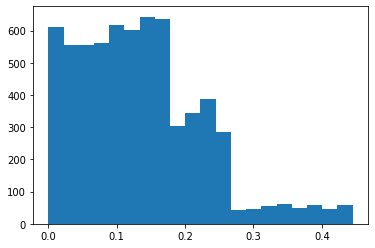

In [ ]:
plt.hist(numericas['log+1'], bins = 20)

Se excluyen los datos de attrition y para la estandarizacion, necesaria para aplicar metodos de reduccion de dimensionalidad

In [ ]:
numericas_x = numericas.drop(['Attrition_rate','log+1'], axis=1)


In [ ]:
numericas_y = numericas.iloc[:,4:6]
numericas_y.head()

,Attrition_rate,log+1
0,0.1841,0.168983
1,0.0670,0.064851
2,0.0851,0.081672
3,0.0668,0.064664
4,0.1827,0.167800


In [ ]:
numericas_x.head()

,Age,Time_of_service,Time_since_promotion,growth_rate
0,42.0,4.0,4,33
1,24.0,5.0,4,36
2,58.0,27.0,3,51
3,26.0,4.0,3,56
4,31.0,5.0,4,62


In [ ]:
#Normalización
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericas_x)

In [ ]:
nume_x_sca= pd.DataFrame(scaled)


In [ ]:
nume_x_sca = nume_x_sca.round(2)

In [ ]:
nume_x_sca.head()

,0,1,2,3
0,0.19,-0.91,1.43,-0.89
1,-1.17,-0.81,1.43,-0.70
2,1.41,1.34,0.56,0.25
3,-1.02,-0.91,0.56,0.57
4,-0.64,-0.81,1.43,0.95


In [ ]:
nume_x_sca.describe()

,0,1,2,3
count,6515.000000,6515.000000,6515.000000,6515.000000
mean,-0.000398,0.000035,0.000525,-0.000078
std,1.000207,0.999905,1.002571,1.000028
min,-1.550000,-1.300000,-2.060000,-1.710000
25%,-0.870000,-0.810000,-1.190000,-0.890000
50%,-0.190000,-0.320000,-0.320000,0.000000
75%,0.870000,0.650000,0.560000,0.890000
max,1.940000,2.810000,1.430000,1.720000


## **PCA**

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca_model = PCA(n_components = 4) #

In [ ]:
pca_model.fit(nume_x_sca)

PCA(n_components=4)

In [ ]:
pca_model.components_

array([[ 0.69251264,  0.6915808 ,  0.20527277, -0.00230914],
       [ 0.04961848,  0.05927156, -0.37746534, -0.92279185],
       [ 0.13281812,  0.13630651, -0.9029721 ,  0.38525481],
       [-0.70733556,  0.70684044,  0.0049392 ,  0.00534708]])

In [ ]:
# Se genera un dataframe con las cargas
pd.DataFrame(
    data    = pca_model.components_,
    columns = numericas_x.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Age,Time_of_service,Time_since_promotion,growth_rate
PC1,0.692513,0.691581,0.205273,-0.002309
PC2,0.049618,0.059272,-0.377465,-0.922792
PC3,0.132818,0.136307,-0.902972,0.385255
PC4,-0.707336,0.706840,0.004939,0.005347


In [ ]:
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum) 

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.47975119 0.73128864 0.97031408 1.        ]


In [ ]:
proyecciones = np.dot(pca_model.components_, scale(nume_x_sca).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2','PC3','PC4'])
proyecciones = proyecciones.transpose().set_index(numericas.index)
proyecciones

,PC1,PC2,PC3,PC4
0,-0.202878,0.238515,-1.729209,-0.775734
1,-1.075842,0.001632,-1.822983,0.257830
2,2.017426,-0.292030,-0.037606,-0.046097
3,-1.222224,-0.841279,-0.543767,0.083552
4,-0.712668,-1.494754,-1.116897,-0.108186
...,...,...,...,...
6510,-0.477982,-1.715987,-0.970903,-0.078560
6511,-0.513074,0.506034,-0.945964,0.047638
6512,0.348130,-0.548443,0.662189,-0.054474
6513,0.881252,2.061415,0.655556,0.324187


In [ ]:
# Quito PC4, ya que hasta PC3 se obtienen componentes que explican hasta el
# 99% de la varianza, si hay poco poder de computo puede considerarse solo
# 2 componentes, que explican el 73% de la varianza
proyecciones = proyecciones.drop(['PC4'],axis=1)

In [ ]:
PCA_fin = proyecciones.join(numericas_y)

In [ ]:
PCA_fin

,PC1,PC2,PC3,PC4,Attrition_rate,log+1
0,-0.202878,0.238515,-1.729209,-0.775734,0.1841,0.168983
1,-1.075842,0.001632,-1.822983,0.257830,0.0670,0.064851
2,2.017426,-0.292030,-0.037606,-0.046097,0.0851,0.081672
3,-1.222224,-0.841279,-0.543767,0.083552,0.0668,0.064664
4,-0.712668,-1.494754,-1.116897,-0.108186,0.1827,0.167800
...,...,...,...,...,...,...
6510,-0.477982,-1.715987,-0.970903,-0.078560,0.2569,0.228648
6511,-0.513074,0.506034,-0.945964,0.047638,0.0480,0.046884
6512,0.348130,-0.548443,0.662189,-0.054474,0.1055,0.100298
6513,0.881252,2.061415,0.655556,0.324187,0.4162,0.347977


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
PCA_fin.to_csv('PCA_fin.csv')
!cp PCA_fin.csv "drive/My Drive/"

### **FA**

Se realiza una prueba de Bartlett para verificar que es posible aplicar el método

In [ ]:
!pip install factor_analyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.9/201.9 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 35.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=b3b57118e08e3e2947f4ecf318492ecc80eafca721d7a3df46db39912dc177e2
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor_analyzer


In [ ]:
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer


In [ ]:
#Código para correr la prueba de Barlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(nume_x_sca)
chi_square_value, p_value

(9883.2150572416, 0.0)

El valor de p es menor a 0.05 por lo tanto es posible aplicar el método

In [ ]:
fa = FactorAnalyzer()
fa.fit(nume_x_sca)
ev, v=fa.get_eigenvalues()
ev

array([1.92098978, 1.00678484, 0.95333389, 0.1188915 ])

Pueden tomarse hasta 3 factores porque son los mas cercanos o superiores a 1.

En este caso consideraré escenarios de 2 y 3 factores



In [ ]:
# Escenario de 2 factores
fa = FactorAnalyzer(n_factors = 2)
fa.fit(nume_x_sca)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

In [ ]:
pd.DataFrame(
    data = fa.loadings_,
    columns = ['Factor1','Factor2'],
    index = numericas_x.columns)

,Factor1,Factor2
Age,0.961785,-0.093864
Time_of_service,0.970395,-0.144483
Time_since_promotion,0.126476,0.112678
growth_rate,-0.028707,0.144376


El primer factor puede ser etiquetado como Edad y servicio, que son los que tienen el valor mas cercano, el segundo factor puede nombrarse Progresos del empleado, ya que los valores mas cercanos en magnitud son el tiempo de servicio, tiempo desde promocion y tasa de crecimiento

In [ ]:
fa.get_factor_variance()

(array([1.8835183 , 0.06322696]),
 array([0.47087957, 0.01580674]),
 array([0.47087957, 0.48668632]))

Puede observarse que este escenario explica una varianza del 48.67%, por lo tanto no es una buena elección de factores

In [ ]:
fab = FactorAnalyzer(n_factors = 3)
fab.fit(nume_x_sca)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
pd.DataFrame(
    data = fab.loadings_,
    columns = ['Factor1','Factor2','Factor3'],
    index = numericas_x.columns)

,Factor1,Factor2,Factor3
Age,0.955031,0.037936,-0.020335
Time_of_service,0.921491,-0.039867,0.022380
Time_since_promotion,0.048190,0.042300,0.138458
growth_rate,-0.000248,0.134273,0.000291


Nuevamente en el factor 1 encontramos relacion entre edad y tiempo de servicio.
En el factor 2 la tasa de crecimiento es el factor con mayor peso estadístico, por lo tanto se le designa como tasa de crecimiento y en el factor 3 puede desirgnarse como Tiempo desde promocion

In [ ]:
fab.get_factor_variance()

(array([1.76355175, 0.02284691, 0.02008493]),
 array([0.44088794, 0.00571173, 0.00502123]),
 array([0.44088794, 0.44659966, 0.4516209 ]))

En este caso se puede observar que la máxima varianza explicada por los 3 factores es de 45%, puede observarse que la varianza explicada por 3 factores es inferior a  la explicada por 2 factores, por lo tanto es mas conveniente solo utilizar 2 factores

In [ ]:
datos_fa = pd.DataFrame(fa.transform(nume_x_sca))
datos_fa

,0,1
0,-0.308909,0.220900
1,-0.962317,-0.133298
2,1.377264,0.322690
3,-0.932569,-0.019945
4,-0.661717,0.229909
...,...,...
6510,-0.490616,0.282198
6511,-0.450451,-0.122486
6512,0.302700,0.121977
6513,0.733339,-0.341031


In [ ]:
fa_com = datos_fa.join(numericas_y)
fa_com

,0,1,Attrition_rate,log+1
0,-0.308909,0.220900,0.1841,0.168983
1,-0.962317,-0.133298,0.0670,0.064851
2,1.377264,0.322690,0.0851,0.081672
3,-0.932569,-0.019945,0.0668,0.064664
4,-0.661717,0.229909,0.1827,0.167800
...,...,...,...,...
6510,-0.490616,0.282198,0.2569,0.228648
6511,-0.450451,-0.122486,0.0480,0.046884
6512,0.302700,0.121977,0.1055,0.100298
6513,0.733339,-0.341031,0.4162,0.347977


In [ ]:
fa_com.to_csv('fa_com.csv')
!cp fa_com.csv "drive/My Drive/"